# TITANIC
### Librerías esenciales

In [40]:
!pip install --upgrade nbformat
!pip install plotly
!pip install streamlit
!pip install xgboost
!pip install --upgrade pandas
!pip install tabulate
%matplotlib inline
import streamlit as st
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split, KFold
from sklearn.preprocessing import LabelEncoder
from sklearn.impute import KNNImputer
from sklearn.metrics import mean_squared_error
from sklearn.neighbors import KNeighborsClassifier
import warnings
from sklearn.linear_model import LogisticRegression
from xgboost import XGBClassifier
import joblib
warnings.filterwarnings('ignore', category=FutureWarning)
from tabulate import tabulate_formats
from tabulate import tabulate


[notice] A new release of pip is available: 24.2 -> 24.3
[notice] To update, run: python.exe -m pip install --upgrade pip



[notice] A new release of pip is available: 24.2 -> 24.3
[notice] To update, run: python.exe -m pip install --upgrade pip



[notice] A new release of pip is available: 24.2 -> 24.3
[notice] To update, run: python.exe -m pip install --upgrade pip



[notice] A new release of pip is available: 24.2 -> 24.3
[notice] To update, run: python.exe -m pip install --upgrade pip



[notice] A new release of pip is available: 24.2 -> 24.3
[notice] To update, run: python.exe -m pip install --upgrade pip



[notice] A new release of pip is available: 24.2 -> 24.3
[notice] To update, run: python.exe -m pip install --upgrade pip


### Lectura del Dataset desde el archivo CSV

In [10]:
df_titanic = r"C:\Users\migue\OneDrive\Documents\Isabella\Proyecto_MOD1\titanic.csv"
df_titanic = pd.read_csv(titanic)

In [11]:
df_titanic.head(8)          # Muestra las primeras 6 filas del DataFrame.
df_titanic.columns           # Muestra los nombres de las columnas.
df_titanic.info()            # Muestra información de tipos de datos y valores nulos.
df_titanic.describe(include='all')  # Muestra estadísticas descriptivas.
df_titanic.shape             # Muestra el tamaño (filas, columnas).
df_titanic.isnull().mean() *100  # Calcula el porcentaje de valores nulos por columna.

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


PassengerId     0.000000
Survived        0.000000
Pclass          0.000000
Name            0.000000
Sex             0.000000
Age            19.865320
SibSp           0.000000
Parch           0.000000
Ticket          0.000000
Fare            0.000000
Cabin          77.104377
Embarked        0.224467
dtype: float64

### Valores nulos y variables categóricas

In [14]:
df_titanic.dropna(subset=['Embarked'], inplace=True)  # Elimina filas con valores nulos en 'Embarked'.
features = df_titanic[['Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare', 'Embarked']]  # Selecciona características relevantes.
df_titanic.drop(columns=['Cabin'], inplace=True)  # Elimina la columna 'Cabin' por alta cantidad de valores nulos.
df_encoded = df_titanic.copy()                    # Crea una copia para codificar variables.
categorical_cols = df_encoded.select_dtypes(include=object).columns  # Identifica columnas categóricas.

# Codifica variables categóricas
for col in categorical_cols:
    df_encoded[col] = LabelEncoder().fit_transform(df_encoded[col].astype(str))

In [15]:
def knn_impute(df):
    imputer = KNNImputer(n_neighbors=5)
    return pd.DataFrame(imputer.fit_transform(df), columns=df.columns)

### K-Fold & modelo KNN

In [16]:
def k_fold_knn():
    k_range = range(1, 21)
    mse_results = []
    rmse_results = []

    # Configuración de validación cruzada K-Fold
    kf = KFold(n_splits=5, shuffle=True, random_state=42)
    
    for k in k_range:
        mse_fold = []
        for train_index, test_index in kf.split(features):
            X_train, X_test = features.iloc[train_index], features.iloc[test_index]
            y_train, y_test = labels.iloc[train_index], labels.iloc[test_index]
            
            # Imputación de valores nulos y entrenamiento del modelo
            X_train_imputed = knn_impute(X_train)
            X_test_imputed = knn_impute(X_test)
            model = KNeighborsClassifier(n_neighbors=k)
            model.fit(X_train_imputed, y_train)
            y_pred = model.predict(X_test_imputed)
            
            # Cálculo de errores
            mse = mean_squared_error(y_test, y_pred)
            mse_fold.append(mse)
        
        mse_results.append(np.mean(mse_fold))
        rmse_results.append(np.sqrt(np.mean(mse_fold)))

    best_k = k_range[np.argmin(mse_results)]
    best_mse = mse_results[np.argmin(mse_results)]
    best_rmse = np.sqrt(best_mse)
    return k_range, mse_results, rmse_results, best_k, best_mse, best_rmse

### Tablas de relación

In [41]:
# 1. Calcular el porcentaje de sobrevivientes según la clase social
survival_rate = df_titanic.groupby('Pclass')['Survived'].mean() * 100
print("Porcentaje de supervivencia según clase social:")
print(tabulate(survival_rate.reset_index(name='Survival Rate (%)'), headers='keys', tablefmt='pretty'))

Porcentaje de supervivencia según clase social:
+---+--------+--------------------+
|   | Pclass | Survival Rate (%)  |
+---+--------+--------------------+
| 0 |  1.0   | 62.616822429906534 |
| 1 |  2.0   | 47.28260869565217  |
| 2 |  3.0   | 24.236252545824847 |
+---+--------+--------------------+


In [42]:
# 2. Crear una tabla de contingencia
contingency_table = pd.crosstab(df_titanic['Pclass'], df_titanic['Survived'], margins=True)
contingency_table.columns = ['No Survived', 'Survived', 'Total']
print("\nTabla de contingencia:")
print(tabulate(contingency_table, headers='keys', tablefmt='pretty'))


Tabla de contingencia:
+--------+-------------+----------+-------+
| Pclass | No Survived | Survived | Total |
+--------+-------------+----------+-------+
|   1    |     80      |   134    |  214  |
|   2    |     97      |    87    |  184  |
|   3    |     372     |   119    |  491  |
|  All   |     549     |   340    |  889  |
+--------+-------------+----------+-------+


In [43]:
# 3. Estadísticas descriptivas para sobrevivientes y no sobrevivientes
descriptive_stats = df_titanic.groupby('Survived').agg({
    'Age': ['mean', 'median', 'std', 'min', 'max'],
    'Fare': ['mean', 'median', 'std', 'min', 'max'],
    'SibSp': 'mean',
    'Parch': 'mean'
}).round(2)

print("\nEstadísticas descriptivas:")
print(tabulate(descriptive_stats, headers='keys', tablefmt='pretty'))


Estadísticas descriptivas:
+----------+-----------------+-------------------+----------------+----------------+----------------+------------------+--------------------+-----------------+-----------------+-----------------+-------------------+-------------------+
| Survived | ('Age', 'mean') | ('Age', 'median') | ('Age', 'std') | ('Age', 'min') | ('Age', 'max') | ('Fare', 'mean') | ('Fare', 'median') | ('Fare', 'std') | ('Fare', 'min') | ('Fare', 'max') | ('SibSp', 'mean') | ('Parch', 'mean') |
+----------+-----------------+-------------------+----------------+----------------+----------------+------------------+--------------------+-----------------+-----------------+-----------------+-------------------+-------------------+
|    0     |      30.63      |       28.0        |     14.17      |      1.0       |      74.0      |      22.12       |        10.5        |      31.39      |       0.0       |      263.0      |       0.55        |       0.33        |
|    1     |      28.19     

### Gráficos de relaciones

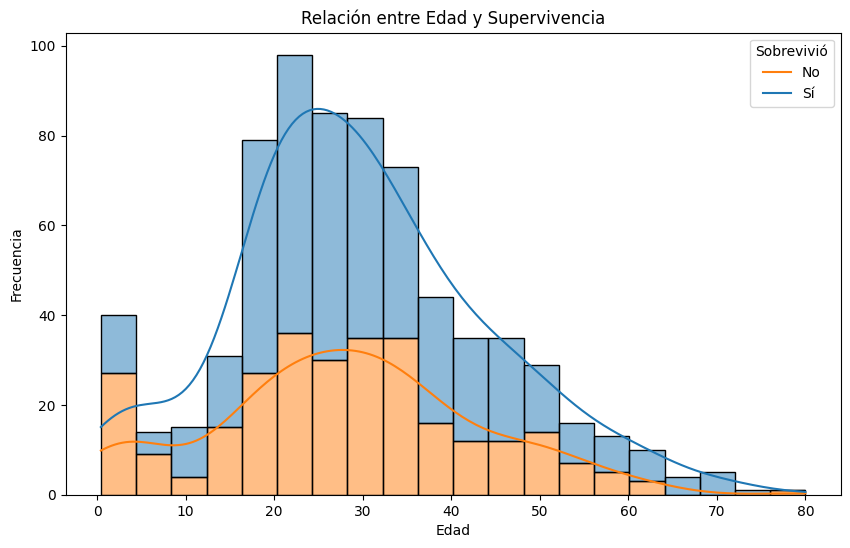

In [26]:
## 1. Relación de la edad con la supervivencia
plt.figure(figsize=(10, 6))
sns.histplot(data=df_titanic, x='Age', hue='Survived', multiple='stack', kde=True)
plt.title("Relación entre Edad y Supervivencia")
plt.xlabel("Edad")
plt.ylabel("Frecuencia")
plt.legend(title='Sobrevivió', labels=['No', 'Sí'])
plt.show()

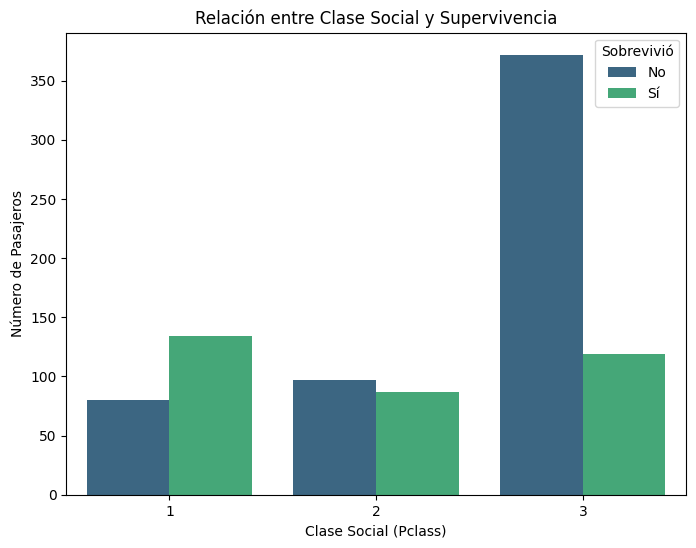

In [27]:
## 2. Relación de la clase social con la supervivencia
plt.figure(figsize=(8, 6))
sns.countplot(data=df_titanic, x='Pclass', hue='Survived', palette='viridis')
plt.title("Relación entre Clase Social y Supervivencia")
plt.xlabel("Clase Social (Pclass)")
plt.ylabel("Número de Pasajeros")
plt.legend(title='Sobrevivió', labels=['No', 'Sí'])
plt.show()

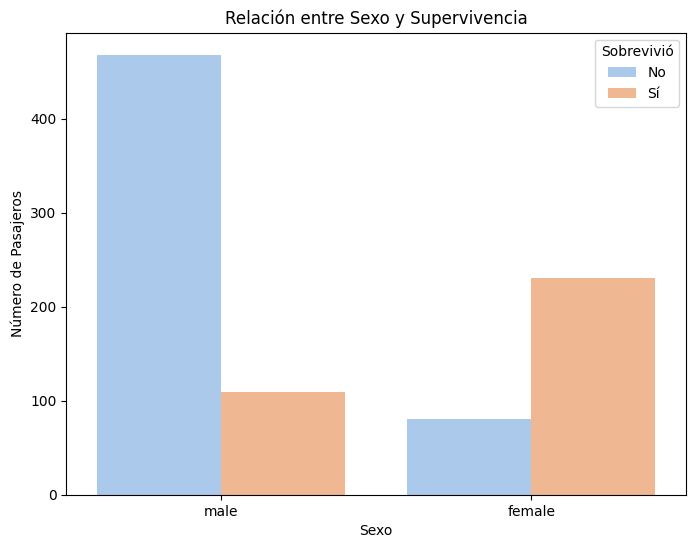

In [28]:
## 3. Relación del sexo con la supervivencia
plt.figure(figsize=(8, 6))
sns.countplot(data=df_titanic, x='Sex', hue='Survived', palette='pastel')
plt.title("Relación entre Sexo y Supervivencia")
plt.xlabel("Sexo")
plt.ylabel("Número de Pasajeros")
plt.legend(title='Sobrevivió', labels=['No', 'Sí'])
plt.show()

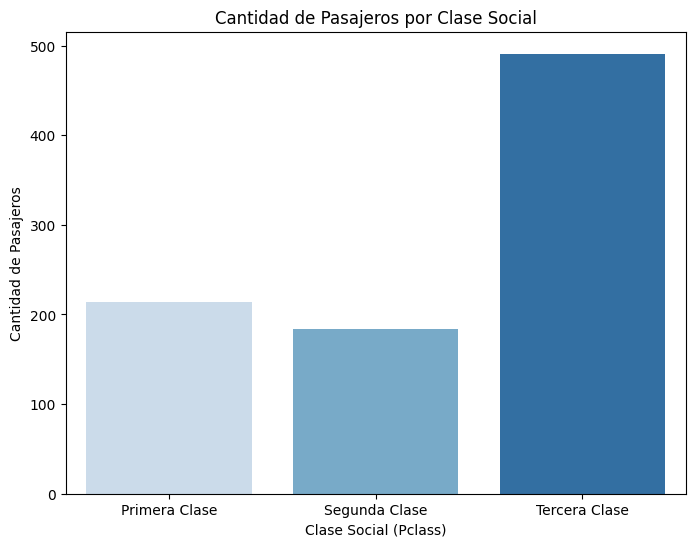

In [29]:
## 4. Gráfico de la cantidad de personas que compraron tickets por clase social
plt.figure(figsize=(8, 6))
sns.countplot(data=df_titanic, x='Pclass', palette='Blues')
plt.title("Cantidad de Pasajeros por Clase Social")
plt.xlabel("Clase Social (Pclass)")
plt.ylabel("Cantidad de Pasajeros")
plt.xticks(ticks=[0, 1, 2], labels=["Primera Clase", "Segunda Clase", "Tercera Clase"])
plt.show()

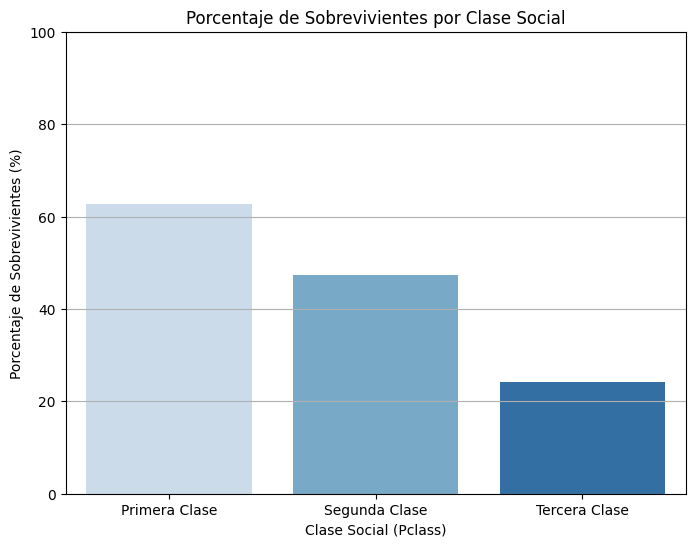

In [34]:
## 5. Gráfico de porcentaje de sobrevivientes por clase social
plt.figure(figsize=(8, 6))
sns.barplot(x=survival_rate.index, y=survival_rate.values, palette='Blues')
plt.title("Porcentaje de Sobrevivientes por Clase Social")
plt.xlabel("Clase Social (Pclass)")
plt.ylabel("Porcentaje de Sobrevivientes (%)")
plt.xticks(ticks=[0, 1, 2], labels=["Primera Clase", "Segunda Clase", "Tercera Clase"])
plt.ylim(0, 100)
plt.grid(axis='y')
plt.show()

Text(0, 0.5, 'Edad')

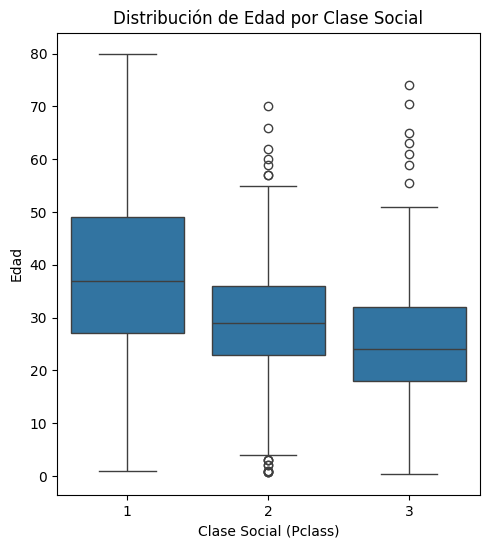

In [35]:
## 6. Gráfico de distribución de edad y tarifas por clase social
plt.figure(figsize=(12, 6))

# Gráfico de distribución de edad
plt.subplot(1, 2, 1)
sns.boxplot(x='Pclass', y='Age', data=df_titanic)
plt.title("Distribución de Edad por Clase Social")
plt.xlabel("Clase Social (Pclass)")
plt.ylabel("Edad")

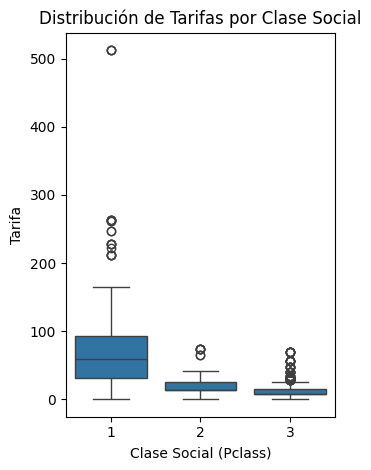

In [36]:
## 7. Gráfico de distribución de tarifas
plt.subplot(1, 2, 2)
sns.boxplot(x='Pclass', y='Fare', data=df_titanic)
plt.title("Distribución de Tarifas por Clase Social")
plt.xlabel("Clase Social (Pclass)")
plt.ylabel("Tarifa")

plt.tight_layout()
plt.show()